# Part 1

# Pre-processing and EDA

In [ ]:
import pandas as pd
import numpy as np
import os
import re
import seaborn as sns
import nltk
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from nltk.stem.wordnet import WordNetLemmatizer
import matplotlib.pyplot as plt
from wordcloud import WordCloud


pd.set_option('display.max_colwidth',200)

# Natural Language Toolkit(nltk)

In [ ]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_eng.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_rus to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |  

True

# Load the tweets dataset

In [ ]:
tweets= pd.read_csv('/content/drive/MyDrive/data set dp and nlp/new data set/tweets.csv')
tweets.head()

id  label  \
0   1      0   
1   2      0   
2   3      0   
3   4      0   
4   5      1   

                                                                                                                                 tweet  
0     #fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone  
1  Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/  
2          We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu  
3                     I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/  
4         What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!

In [ ]:
tweets.shape

(7920, 3)

# 0 refers to positive sentiment , 1 is negative sentiment.

## let's map 0 as 1 and 1 as 0

In [ ]:
tweets['label']=tweets['label'].map({0:1,1:0})
tweets.head()

id  label  \
0   1      1   
1   2      1   
2   3      1   
3   4      1   
4   5      0   

                                                                                                                                 tweet  
0     #fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone  
1  Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/  
2          We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu  
3                     I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/  
4         What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!

In [ ]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


# Basic Exploratory Data Analysis

In [ ]:
# check for missing values
tweets.isnull().sum()

id       0
label    0
tweet    0
dtype: int64

In [ ]:
# drop the id column
tweets.drop('id',axis=1,inplace=True)

In [ ]:
tweets.head()

label  \
0      1   
1      1   
2      1   
3      1   
4      0   

                                                                                                                                 tweet  
0     #fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone  
1  Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/  
2          We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu  
3                     I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/  
4         What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!

In [ ]:
tweets['label'].value_counts()

label
1    5894
0    2026
Name: count, dtype: int64

In [ ]:
# check for class balance
tweets['label'].value_counts(normalize=True)

label
1    0.744192
0    0.255808
Name: proportion, dtype: float64

In [ ]:
tweets['tweet'].unique()

array(['#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone',
       'Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/',
       'We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu',
       ...,
       "Helping my lovely 90 year old neighbor with her iPad this morning has just made me realise that 'I' don't actually need an I pad!",
       'Finally got my #smart #pocket #wifi stay connected anytime,anywhere! #ipad and #samsung #s3 #gadget # http://instagr.am/p/U-53G_vJU8/',
       'Apple Barcelona!!! #Apple #Store #BCN #Barcelona #travel #iphone #selfie #fly #fun #cabincrew… http://instagram.com/p/wBApVzpCl3/'],
      dtype=object)

# importing seaborn for EDA

<Axes: xlabel='label', ylabel='count'>

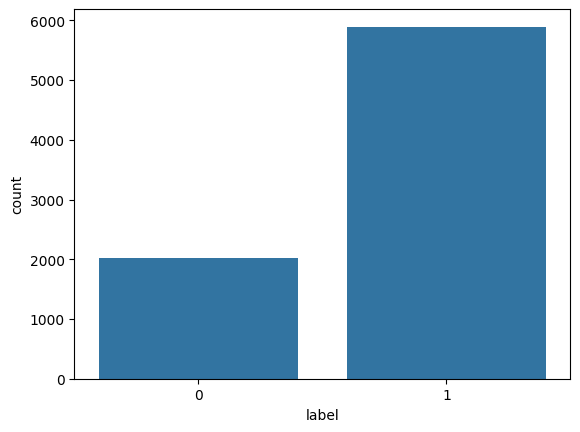

In [ ]:
sns.countplot(data=tweets,x='label')

# Data Cleaning

In [ ]:
tweets['tweet'][24]

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [ ]:
tweets['tweet'][14]

'@shaqlockholmes @sam_louise1991 the battery is so painful! I charge it overnight and by lunchtime battery is dead! #HateOrange.'

# regular expression

In [ ]:
re.sub(r"'s\b"," is",tweets['tweet'][24])

'It is time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/'

In [ ]:
tweets['tweet'][11]

'Ha! Not heavy machinery but it does what I need it to. @Apple really dropped the ball with that design. #drinkyourhaterade'

In [ ]:
# remove the user mentions
re.sub("@[A-Za-z0-9]+"," ",tweets['tweet'][11])

'Ha! Not heavy machinery but it does what I need it to.   really dropped the ball with that design. #drinkyourhaterade'

In [ ]:
tweets['tweet'][0]

'#fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [ ]:
# remove hastags
re.sub(r"#","",tweets['tweet'][0])

'fingerprint Pregnancy Test https://goo.gl/h1MfQV android apps beautiful cute health igers iphoneonly iphonesia iphone'

In [ ]:
# remove hyperlinks
re.sub(r"https\S+","",tweets['tweet'][0])

'#fingerprint #Pregnancy Test  #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone'

In [ ]:
tweets['tweet'][25]

'1.05 billion for 3 patents where there is prior art = 300 millions each = patent trolls are partying now thanks to Apple #apple'

In [ ]:
# retain only the alphabets(get rid of punct , special char, digits)
re.sub(r"[^a-zA-z]"," ",tweets['tweet'][25])

'     billion for   patents where there is prior art       millions each   patent trolls are partying now thanks to Apple  apple'

# CONTRACTIONS

In [ ]:
!pip install contractions
import contractions

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 289.9/289.9 kB 11.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 118.3/118.3 kB 10.0 MB/s eta 0:00:00


In [ ]:
contractions.fix("I'm bored")

'I am bored'

In [ ]:
tweets['tweet'][24]

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [ ]:
contractions.fix(tweets['tweet'][24])

'It is time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/'

# stopword removal

In [ ]:
# from nltk
nltk_stopwords=set(stopwords.words('english'))
print(nltk_stopwords)

{'can', 'further', 'being', 'very', 'do', 'to', 'up', "they'll", 'now', 'once', 'you', 'because', 'when', 'how', 'a', 'before', 'where', 'no', 'those', 'here', "she's", 'under', 'mightn', 'weren', 'them', 'has', "should've", 'just', 'all', 'below', 'y', 'and', 'this', "won't", 'yourselves', 'more', 've', "hadn't", 'did', 'they', "you'd", 'of', 'ma', "weren't", 'o', "don't", 'as', 'herself', 'any', "it'd", 'doing', 'until', 'which', 'in', 'don', "they're", 'couldn', 'with', 'these', 'nor', 'been', 'aren', "she'd", 'wasn', 'for', 'other', 'we', 'what', 'why', 's', 're', 'again', 'his', 'won', 'having', "didn't", 'through', 'mustn', "they've", "we're", 'such', "aren't", 'so', "you'll", "i'm", "he'd", "he's", 'was', 'haven', 'most', 'by', 'only', "he'll", 'off', 'will', 'an', "haven't", 'himself', "it's", 'at', 'itself', "i've", 'be', 'both', 'are', 'on', 'than', "we'd", "we've", 'if', 'our', 'm', "hasn't", 'into', 'that', 'not', "shouldn't", "couldn't", 'he', 'it', 'ours', "mustn't", 'aga

In [ ]:
len(nltk_stopwords)

198

# english stop words

In [ ]:
sklearn_stopwords=set(ENGLISH_STOP_WORDS)
print(sklearn_stopwords)

{'further', 'wherever', 'very', 'to', 'ever', 'thus', 'seeming', 'yet', 'you', 'become', 'thru', 'now', 'fill', 'once', 'up', 'amongst', 'done', 'how', 'last', 'due', 'a', 'whereas', 'before', 'no', 'those', 'here', 'under', 'them', 'etc', 'wherein', 'may', 'many', 'several', 'mill', 'more', 'they', 'describe', 'besides', 'could', 'fifteen', 'became', 'towards', 'anyhow', 'herself', 'any', 'nobody', 'which', 'in', 'within', 'one', 'with', 'sincere', 'beforehand', 'been', 'nor', 'seem', 'former', 'mine', 'my', 'six', 'fifty', 'whereby', 'for', 'whole', 'other', 'what', 'might', 'eleven', 'via', 'would', 're', 'hereafter', 'thereupon', 'keep', 'behind', 'sixty', 'detail', 'found', 'nine', 'either', 'moreover', 'next', 'every', 'interest', 'made', 'most', 'will', 'beside', 'an', 'himself', 'hence', 'itself', 'be', 'latter', 'both', 'are', 'everything', 'rather', 'couldnt', 'our', 'con', 'twenty', 'namely', 'into', 'otherwise', 'that', 'it', 'sometimes', 'almost', 'ours', 'therefore', 'sho

In [ ]:
len(sklearn_stopwords)

318

In [ ]:
print(sklearn_stopwords.intersection(nltk_stopwords))

{'can', 'further', 'very', 'being', 'do', 'to', 'up', 'you', 'now', 'once', 'because', 'when', 'how', 'a', 'before', 'where', 'no', 'those', 'here', 'under', 'them', 'has', 'all', 'below', 'and', 'this', 'yourselves', 'more', 'they', 'of', 'as', 'herself', 'any', 'until', 'which', 'in', 'with', 'these', 'nor', 'been', 'for', 'other', 'we', 'what', 'why', 're', 'again', 'his', 'through', 'such', 'so', 'was', 'most', 'by', 'only', 'off', 'will', 'himself', 'an', 'at', 'itself', 'be', 'both', 'are', 'on', 'than', 'if', 'our', 'into', 'that', 'not', 'he', 'it', 'ours', 'against', 'should', 'then', 'themselves', 'while', 'hers', 'above', 'were', 'between', 'each', 'about', 'who', 'ourselves', 'your', 'the', 'i', 'him', 'during', 'is', 'yours', 'myself', 'few', 'too', 'its', 'some', 'same', 'or', 'from', 'over', 'yourself', 'down', 'but', 'me', 'had', 'out', 'her', 'own', 'she', 'their', 'there', 'whom', 'have', 'my', 'after', 'am'}


In [ ]:
len(sklearn_stopwords.intersection(nltk_stopwords))

119

## combining the stopwords from sklearn & NLTK

In [ ]:
combined_stopwords=sklearn_stopwords.union(nltk_stopwords)

In [ ]:
len(combined_stopwords)

397

# Text Normalization - Stemming or Lemmatization

In [ ]:
lemmatizer = WordNetLemmatizer()
lemmatizer.lemmatize('dogs')

'dog'

In [ ]:
tweets['tweet'][63]

'Gain Followers RT This MUST FOLLOW ME I FOLLOW BACK Follow everyone who rts Gain #iphone #sougofollow #ff i7si'

In [ ]:
tweets['tweet'][63].split()

['Gain',
 'Followers',
 'RT',
 'This',
 'MUST',
 'FOLLOW',
 'ME',
 'I',
 'FOLLOW',
 'BACK',
 'Follow',
 'everyone',
 'who',
 'rts',
 'Gain',
 '#iphone',
 '#sougofollow',
 '#ff',
 'i7si']

In [ ]:
new_sent = " "
for token in tweets['tweet'][63].split():
  new_sent = new_sent + lemmatizer.lemmatize(token.lower()) + ' '
new_sent

' gain follower rt this must follow me i follow back follow everyone who rts gain #iphone #sougofollow #ff i7si '

# Define a Cleaner Function to handle all type of problem at one go

In [ ]:
def tweet_cleaner(raw_tweet):
  """this function cleans the raw tweet """
  # substituting contractions
  cleaned_tweet = contractions.fix(raw_tweet)
  # remove the user mentions
  cleaned_tweet = re.sub(r"@[A-Za-z0-9]+","",cleaned_tweet)
  # remove the hastags
  cleaned_tweet = re.sub(r"#","",cleaned_tweet)
  # remove hyperlinks
  cleaned_tweet =re.sub(r"http\S+","",cleaned_tweet)
  # retain only the alphabets (get rid of punct,special char,digits)
  cleaned_tweet =re.sub(r"[^a-zA-Z]"," ",cleaned_tweet)
  cleaned_tweet =cleaned_tweet.lower().strip()
  cleaned_tweet = [token for token in cleaned_tweet.split() if len(token)>2]
  new_sent = ''
  for token in cleaned_tweet:
    new_sent =new_sent + lemmatizer.lemmatize(token) + ' '
  return new_sent.strip()

In [ ]:
tweets['tweet'][24]

"It's time for new wallpapers #phone #wallpapers #wall #screen #galaxy #samsung #app … https://www.instagram.com/p/BcsKTNNn51c/"

In [ ]:
tweet_cleaner(tweets['tweet'][24])

'time for new wallpaper phone wallpaper wall screen galaxy samsung app'

In [ ]:
tweets['cleaned_tweets'] = tweets['tweet'].apply(tweet_cleaner)

In [ ]:
tweets.head()

label  \
0      1   
1      1   
2      1   
3      1   
4      0   

                                                                                                                                 tweet  \
0     #fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone   
1  Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/   
2          We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu   
3                     I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/   
4         What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!   

                                                                                               cleaned_tweets  
0             fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone  
1                                  finally transparant silicon case thanks uncle yay sony xperia sonyexperias  
2                           love this would you talk makememories unplug relax iphone smartphone wifi connect  
3                                                wired know george wa made that way iphone cute daventry home  
4  what amazing service apple will not even talk about question have unless pay them for their stupid support

In [ ]:
tweets.tail(10)

label  \
7910      1   
7911      1   
7912      1   
7913      0   
7914      1   
7915      1   
7916      1   
7917      1   
7918      1   
7919      1   

                                                                                                                                       tweet  \
7910       Perfect match #instagood #applewatch #red #instagram #iphone #picoftheday #gay #fashion… https://www.instagram.com/p/BPBDUMEAQgb/   
7911                                                              I am completely in love with the new iPhone emojis!! #iPhone #apple #emojs   
7912                             Tune in. Turn on. Drop out. & #GTD in one app! http://bit.ly/cebF6 #mobile #mind #meditate #opensit #iphone   
7913                        Ok so my galaxy crashed after one day now I have to wait til Monday for my skyrocket but using iPhone for now...   
7914                              Gain Followers RT This MUST FOLLOW ME I FOLLOW BACK Follow everyone who rts Gain #iphone #sougofollow 1ö[q   
7915                             Live out loud #lol #liveoutloud #selfie #smile #sony #music #headphones https://instagram.com/p/5spiNsJ_c9/   
7916  We would like to wish you an amazing day! Make every minute count #tls #today #iphone #accessories #news #life February 23, 2017 at 0…   
7917       Helping my lovely 90 year old neighbor with her iPad this morning has just made me realise that 'I' don't actually need an I pad!   
7918   Finally got my #smart #pocket #wifi stay connected anytime,anywhere! #ipad and #samsung #s3 #gadget # http://instagr.am/p/U-53G_vJU8/   
7919       Apple Barcelona!!! #Apple #Store #BCN #Barcelona #travel #iphone #selfie #fly #fun #cabincrew… http://instagram.com/p/wBApVzpCl3/   

                                                                                                   cleaned_tweets  
7910                              perfect match instagood applewatch red instagram iphone picoftheday gay fashion  
7911                                                completely love with the new iphone emojis iphone apple emojs  
7912                                           tune turn drop out gtd one app mobile mind meditate opensit iphone  
7913                 galaxy crashed after one day now have wait til monday for skyrocket but using iphone for now  
7914                   gain follower this must follow follow back follow everyone who rts gain iphone sougofollow  
7915                                              live out loud lol liveoutloud selfie smile sony music headphone  
7916         would like wish you amazing day make every minute count tl today iphone accessory news life february  
7917  helping lovely year old neighbor with her ipad this morning ha just made realise that not actually need pad  
7918                        finally got smart pocket wifi stay connected anytime anywhere ipad and samsung gadget  
7919                             apple barcelona apple store bcn barcelona travel iphone selfie fly fun cabincrew

# Data Visialization

In [ ]:
# create a python list of all the words from all the tweets
vocab_raw = []
for tweet in tweets['tweet']:
  vocab_raw.extend(tweet.split())
print(vocab_raw)

['#fingerprint', '#Pregnancy', 'Test', 'https://goo.gl/h1MfQV', '#android', '#apps', '#beautiful', '#cute', '#health', '#igers', '#iphoneonly', '#iphonesia', '#iphone', 'Finally', 'a', 'transparant', 'silicon', 'case', '^^', 'Thanks', 'to', 'my', 'uncle', ':)', '#yay', '#Sony', '#Xperia', '#S', '#sonyexperias…', 'http://instagram.com/p/YGEt5JC6JM/', 'We', 'love', 'this!', 'Would', 'you', 'go?', '#talk', '#makememories', '#unplug', '#relax', '#iphone', '#smartphone', '#wifi', '#connect...', 'http://fb.me/6N3LsUpCu', "I'm", 'wired', 'I', 'know', "I'm", 'George', 'I', 'was', 'made', 'that', 'way', ';)', '#iphone', '#cute', '#daventry', '#home', 'http://instagr.am/p/Li_5_ujS4k/', 'What', 'amazing', 'service!', 'Apple', "won't", 'even', 'talk', 'to', 'me', 'about', 'a', 'question', 'I', 'have', 'unless', 'I', 'pay', 'them', '$19.95', 'for', 'their', 'stupid', 'support!', 'iPhone', 'software', 'update', 'fucked', 'up', 'my', 'phone', 'big', 'time', 'Stupid', 'iPhones', 'Happy', 'for', 'us', 

In [ ]:
len(vocab_raw)

133400

In [ ]:
vocab_raw = [token for tweet in tweets['tweet'] for token in tweet.split()]
print(vocab_raw)

['#fingerprint', '#Pregnancy', 'Test', 'https://goo.gl/h1MfQV', '#android', '#apps', '#beautiful', '#cute', '#health', '#igers', '#iphoneonly', '#iphonesia', '#iphone', 'Finally', 'a', 'transparant', 'silicon', 'case', '^^', 'Thanks', 'to', 'my', 'uncle', ':)', '#yay', '#Sony', '#Xperia', '#S', '#sonyexperias…', 'http://instagram.com/p/YGEt5JC6JM/', 'We', 'love', 'this!', 'Would', 'you', 'go?', '#talk', '#makememories', '#unplug', '#relax', '#iphone', '#smartphone', '#wifi', '#connect...', 'http://fb.me/6N3LsUpCu', "I'm", 'wired', 'I', 'know', "I'm", 'George', 'I', 'was', 'made', 'that', 'way', ';)', '#iphone', '#cute', '#daventry', '#home', 'http://instagr.am/p/Li_5_ujS4k/', 'What', 'amazing', 'service!', 'Apple', "won't", 'even', 'talk', 'to', 'me', 'about', 'a', 'question', 'I', 'have', 'unless', 'I', 'pay', 'them', '$19.95', 'for', 'their', 'stupid', 'support!', 'iPhone', 'software', 'update', 'fucked', 'up', 'my', 'phone', 'big', 'time', 'Stupid', 'iPhones', 'Happy', 'for', 'us', 

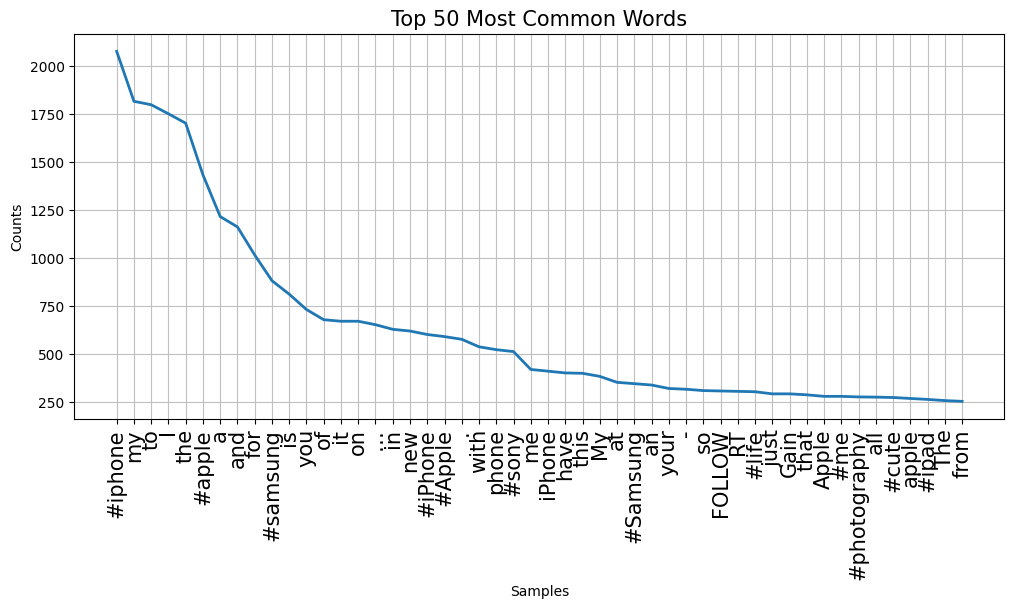

In [ ]:
# Frequency distribution of the words
freq_dist = nltk.FreqDist(vocab_raw)
plt.figure(figsize=(12,5))
plt.title("Top 50 Most Common Words", fontsize=15)
plt.xticks(fontsize=15)
freq_dist.plot(50, cumulative=False)
plt.show()

In [ ]:
freq_dist

FreqDist({'#iphone': 2077, 'my': 1817, 'to': 1799, 'I': 1752, 'the': 1703, '#apple': 1434, 'a': 1217, 'and': 1163, 'for': 1017, '#samsung': 883, ...})

# Freq Dist plot for cleaned_tweets

In [ ]:
vocab_raw = [token for tweet in tweets['cleaned_tweets'] for token in tweet.split()]
print(vocab_raw)

['fingerprint', 'pregnancy', 'test', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly', 'iphonesia', 'iphone', 'finally', 'transparant', 'silicon', 'case', 'thanks', 'uncle', 'yay', 'sony', 'xperia', 'sonyexperias', 'love', 'this', 'would', 'you', 'talk', 'makememories', 'unplug', 'relax', 'iphone', 'smartphone', 'wifi', 'connect', 'wired', 'know', 'george', 'wa', 'made', 'that', 'way', 'iphone', 'cute', 'daventry', 'home', 'what', 'amazing', 'service', 'apple', 'will', 'not', 'even', 'talk', 'about', 'question', 'have', 'unless', 'pay', 'them', 'for', 'their', 'stupid', 'support', 'iphone', 'software', 'update', 'fucked', 'phone', 'big', 'time', 'stupid', 'iphones', 'happy', 'for', 'instapic', 'instadaily', 'sony', 'xperia', 'xperiaz', 'new', 'type', 'charger', 'cable', 'bay', 'amazon', 'etsy', 'new', 'year', 'rob', 'cross', 'toby', 'young', 'evemun', 'mcmafia', 'taylor', 'spectre', 'newyear', 'starting', 'recipe', 'technology', 'samsunggalaxys', 'iphonex', 'pic'

In [ ]:
len(vocab_raw)

106654

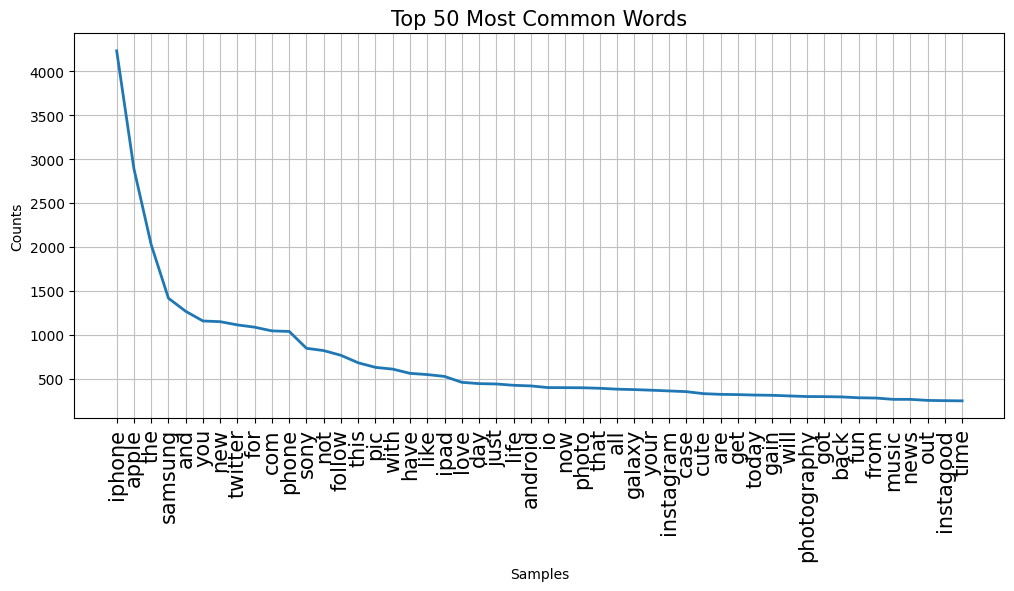

In [ ]:
# Frequency distribution of the words
freq_dist = nltk.FreqDist(vocab_raw)
plt.figure(figsize=(12,5))
plt.title("Top 50 Most Common Words", fontsize=15)
plt.xticks(fontsize=15)
freq_dist.plot(50, cumulative=False)
plt.show()

In [ ]:
freq_dist

FreqDist({'iphone': 4231, 'apple': 2890, 'the': 2025, 'samsung': 1416, 'and': 1267, 'you': 1157, 'new': 1149, 'twitter': 1112, 'for': 1086, 'com': 1044, ...})

In [ ]:
combined_stopwords

{'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'ain',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amoungst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'are',
 'aren',
 "aren't",
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'bill',
 'both',
 'bottom',
 'but',
 'by',
 'call',
 'can',
 'cannot',
 'cant',
 'co',
 'con',
 'could',
 'couldn',
 "couldn't",
 'couldnt',
 'cry',
 'd',
 'de',
 'describe',
 'detail',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'done',
 'down',
 'due',
 'during',
 'each',
 'eg',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'etc',
 'even',
 'ever',
 

# Fre Dist plot for cleaned tweets, after removing stopwords

In [ ]:
domain_stopwords  = {'twitter','com','io','IO','instagram','facebook','rt'}
domain_stopwords

{'IO', 'com', 'facebook', 'instagram', 'io', 'rt', 'twitter'}

In [ ]:
combined_stopwords = combined_stopwords.union(domain_stopwords)
len(combined_stopwords)

404

In [ ]:
def tweet_cleaner_with_stopwords(raw_tweet):
  """this function cleans the raw tweet """
  # substituting contractions
  cleaned_tweet = contractions.fix(raw_tweet)
  # remove the user mentions
  cleaned_tweet = re.sub(r"@[A-Za-z0-9]+"," ",cleaned_tweet)
  # remove the hastags
  cleaned_tweet = re.sub(r"#"," ",cleaned_tweet)
  # remove the hyperlink
  cleaned_tweet= re.sub(r"http\S+"," ",cleaned_tweet)
  # retain only the alphabets (get rid of punct , special char,digits)
  cleaned_tweet = re.sub(r"[^a-zA-Z]"," ",cleaned_tweet)
  cleaned_tweet = cleaned_tweet.lower().strip()
  # remove stopwords from the new_sent
  cleaned_tweet = [token for token in cleaned_tweet.split() if token not in combined_stopwords]
  # retain only those token which ihave length > 2 characters
  cleaned_tweet = [token for token in cleaned_tweet if len(token)>2]
  new_sent = ''
  for token in cleaned_tweet:
    new_sent = new_sent + lemmatizer.lemmatize(token) + ' '
  return new_sent.strip()

In [ ]:
tweets["cleaned_tweets_without_stopwords"] = tweets["tweet"].apply(tweet_cleaner_with_stopwords)
tweets.head()

label  \
0      1   
1      1   
2      1   
3      1   
4      0   

                                                                                                                                 tweet  \
0     #fingerprint #Pregnancy Test https://goo.gl/h1MfQV #android #apps #beautiful #cute #health #igers #iphoneonly #iphonesia #iphone   
1  Finally a transparant silicon case ^^ Thanks to my uncle :) #yay #Sony #Xperia #S #sonyexperias… http://instagram.com/p/YGEt5JC6JM/   
2          We love this! Would you go? #talk #makememories #unplug #relax #iphone #smartphone #wifi #connect... http://fb.me/6N3LsUpCu   
3                     I'm wired I know I'm George I was made that way ;) #iphone #cute #daventry #home http://instagr.am/p/Li_5_ujS4k/   
4         What amazing service! Apple won't even talk to me about a question I have unless I pay them $19.95 for their stupid support!   

                                                                                               cleaned_tweets  \
0             fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone   
1                                  finally transparant silicon case thanks uncle yay sony xperia sonyexperias   
2                           love this would you talk makememories unplug relax iphone smartphone wifi connect   
3                                                wired know george wa made that way iphone cute daventry home   
4  what amazing service apple will not even talk about question have unless pay them for their stupid support   

                                                                  cleaned_tweets_without_stopwords  
0  fingerprint pregnancy test android apps beautiful cute health igers iphoneonly iphonesia iphone  
1                       finally transparant silicon case thanks uncle yay sony xperia sonyexperias  
2                               love talk makememories unplug relax iphone smartphone wifi connect  
3                                                  wired know george way iphone cute daventry home  
4                                    amazing service apple talk question unless pay stupid support

In [ ]:
vocab_raw1 = [token for tweet in tweets['cleaned_tweets_without_stopwords'] for token in tweet.split()]
print(vocab_raw1)

['fingerprint', 'pregnancy', 'test', 'android', 'apps', 'beautiful', 'cute', 'health', 'igers', 'iphoneonly', 'iphonesia', 'iphone', 'finally', 'transparant', 'silicon', 'case', 'thanks', 'uncle', 'yay', 'sony', 'xperia', 'sonyexperias', 'love', 'talk', 'makememories', 'unplug', 'relax', 'iphone', 'smartphone', 'wifi', 'connect', 'wired', 'know', 'george', 'way', 'iphone', 'cute', 'daventry', 'home', 'amazing', 'service', 'apple', 'talk', 'question', 'unless', 'pay', 'stupid', 'support', 'iphone', 'software', 'update', 'fucked', 'phone', 'big', 'time', 'stupid', 'iphones', 'happy', 'instapic', 'instadaily', 'sony', 'xperia', 'xperiaz', 'new', 'type', 'charger', 'cable', 'bay', 'amazon', 'etsy', 'new', 'year', 'rob', 'cross', 'toby', 'young', 'evemun', 'mcmafia', 'taylor', 'spectre', 'newyear', 'starting', 'recipe', 'technology', 'samsunggalaxys', 'iphonex', 'pic', 'pjiwq', 'wtc', 'bout', 'shopping', 'listening', 'music', 'iphone', 'justme', 'music', 'likeforlike', 'followforfollow', 'p

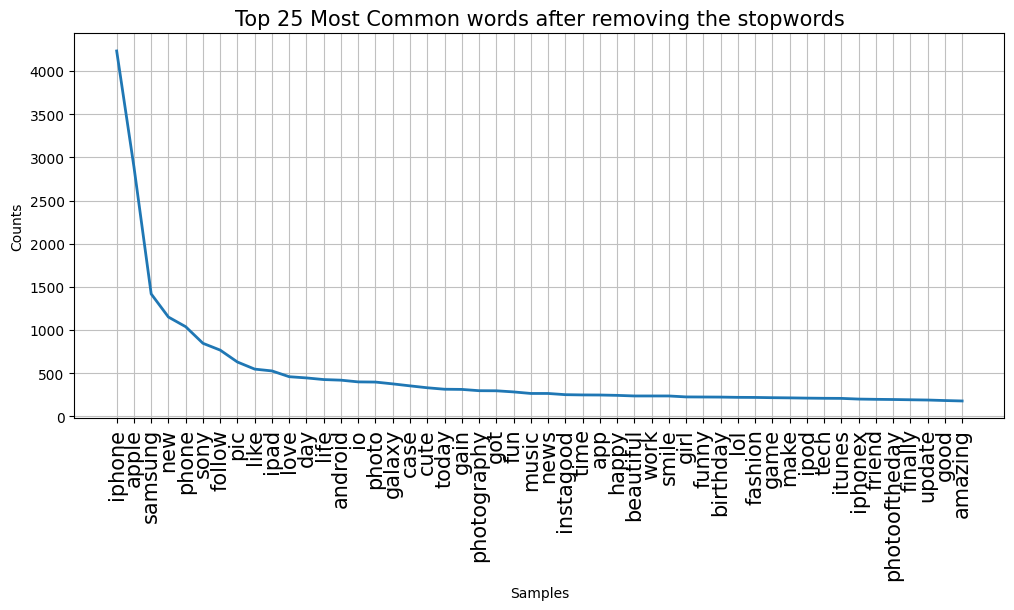

In [ ]:
# Frequency distribution of words
freq_dist = nltk.FreqDist(vocab_raw1)
plt.figure(figsize=(12,5))
plt.title("Top 25 Most Common words after removing the stopwords", fontsize=15)
plt.xticks(fontsize=15)
freq_dist.plot(50, cumulative = False)
plt.show()

In [ ]:
freq_dist

FreqDist({'iphone': 4232, 'apple': 2891, 'samsung': 1418, 'new': 1150, 'phone': 1038, 'sony': 846, 'follow': 767, 'pic': 629, 'like': 547, 'ipad': 526, ...})

# Create word clouds for better visualization (freq_dist)


In [ ]:
!pip install WordCloud
from wordcloud import WordCloud

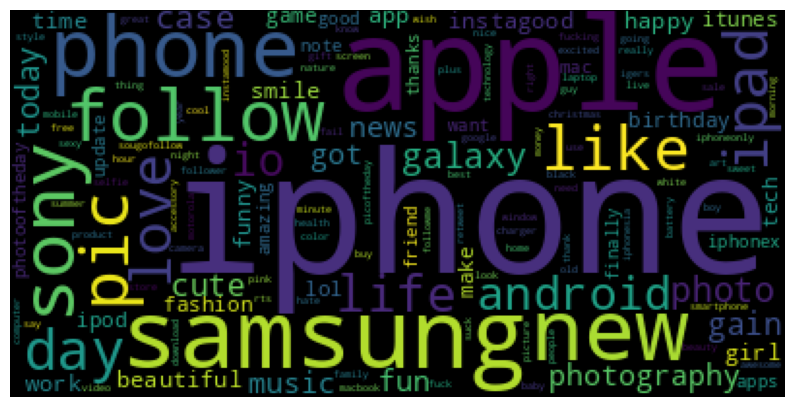

In [ ]:
wordcloud = WordCloud(stopwords= combined_stopwords)
wordcloud.generate_from_frequencies(freq_dist)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

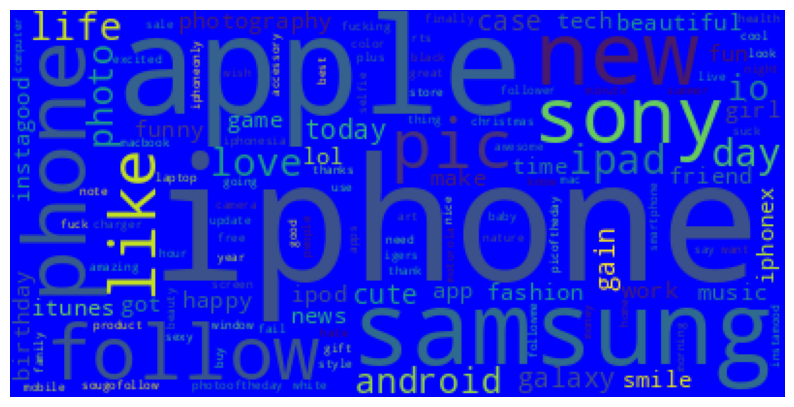

In [ ]:
wordcloud = WordCloud(stopwords= combined_stopwords,background_color='blue',\
                      contour_width = 3 ,contour_color='steelblue')
wordcloud.generate_from_frequencies(freq_dist)
plt.figure(figsize=(10,8))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [ ]:
# saving the cleaned dataset for further text/sentiment analysis
tweets.to_pickle("cleaned_tweets_v1.pkl")